In [2]:
import saspy
sas = saspy.SASsession()

Using SAS Config named: oda
SAS Connection established. Subprocess id is 4780



### distribution

In [2]:
df = sas.sasdata("cars","sashelp").to_df()
df

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565.0,38203.0,2.4,5.0,197.0,21.0,28.0,3450.0,105.0,186.0
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565.0,40083.0,2.3,5.0,242.0,20.0,26.0,3450.0,105.0,186.0
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210.0,42573.0,2.9,6.0,268.0,19.0,26.0,3653.0,110.0,190.0
426,Volvo,V40,Wagon,Europe,Front,26135.0,24641.0,1.9,4.0,170.0,22.0,29.0,2822.0,101.0,180.0


In [5]:
sas.submitLST(
f"""
title;
proc univariate data=sashelp.cars ;
    var msrp;
run;
""", method="listorlog")

### stat graphs


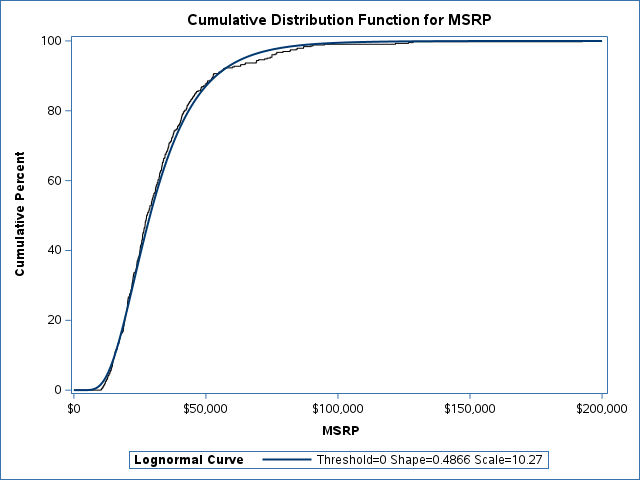

In [9]:
# cdf
# distributions incl: normal beta exponential gamma lognormal weibull
# noprint for chart only
sas.submitLST(
f"""
proc univariate data=sashelp.cars noprint;
    var msrp;
    cdfplot msrp / lognormal;
run;
""", method="listorlog")


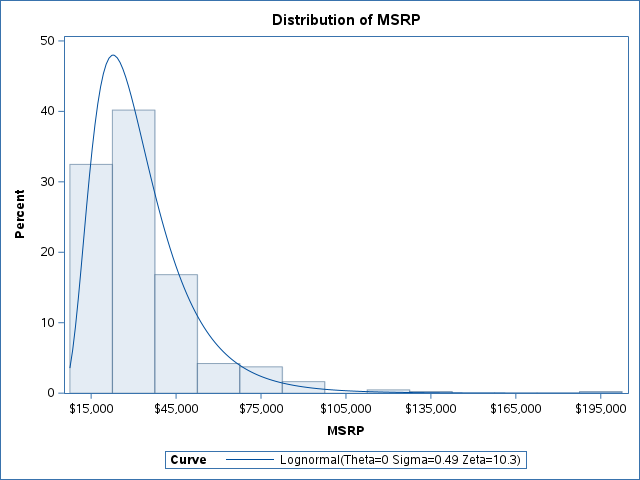

In [10]:
# histogram
sas.submitLST(
f"""
proc univariate data=sashelp.cars noprint;
    var msrp;
    histogram msrp / lognormal;
run;
""", method="listorlog")


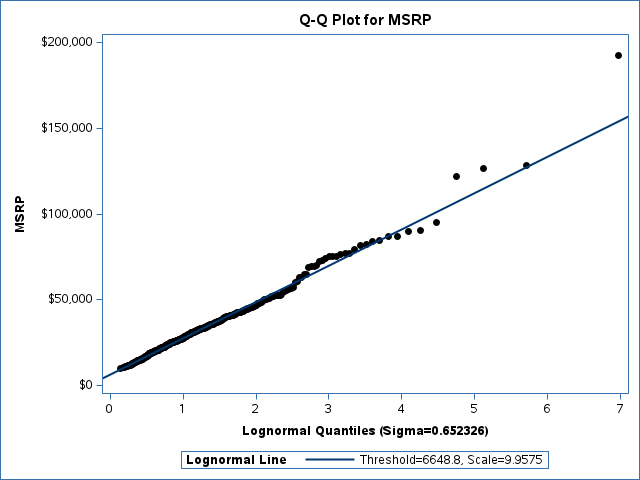

In [9]:
# qqplot
sas.submitLST(
f"""
proc univariate data=sashelp.cars noprint;
    var msrp;
    qqplot msrp / lognormal(scale=est shape=est threshold=est);
run;
""", method="listorlog")


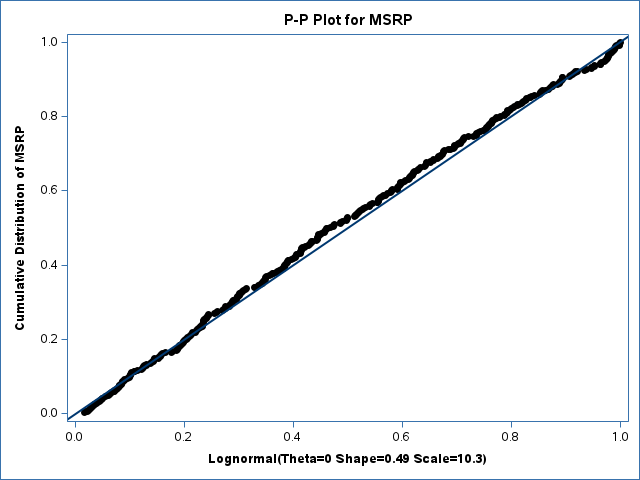

In [21]:
# ppplot
sas.submitLST(
f"""
proc univariate data=sashelp.cars noprint;
    var msrp;
    ppplot msrp / lognormal;
run;
""", method="listorlog")


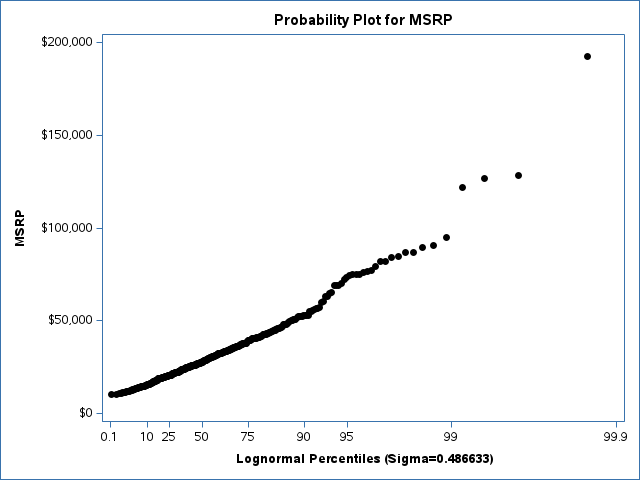

In [25]:
# probplot
sas.submitLST(
f"""
proc univariate data=sashelp.cars noprint;
    var msrp;
    probplot msrp / lognormal(shape=est);
run;
""", method="listorlog")